In [29]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
# read in file and create dataframe
df = pd.read_csv('advance_tape.csv')

Please analyze the data and provide us insights about our advance originations and
performance data. Produce a light report on your findings.
Here are examples of questions we are looking for within the data:
1. Default rates by loan amount
2. Advance originations by different segmentations

## Exploratoy Data Analysis

In [4]:
df.head(10)

,user_id,id,origination_date,amount,banks,location_state,default_flag,pay_frequency
0,00005d618,dab032b8f,2018-09-18,170,Citi,NY,1,Monthly
1,00005d618,ef2879a5d,2018-04-27,130,Wells,TX,0,Irregular
2,0000759ff,8739db27d,2018-04-26,170,Chime,FL,0,Irregular
3,0000759ff,4d27ee400,2018-11-02,140,Wells,GA,0,Irregular
4,0000759ff,18e3eb77d,2018-09-01,170,Chase,CA,0,Monthly
5,000092b1c,0ff223e62,2018-07-18,150,Wells,CA,0,Irregular
6,000092b1c,d4e023bab,2018-11-27,120,Chime,FL,0,Weekly
7,000092b1c,375b599a5,2018-08-18,180,Chase,NY,0,Weekly
8,000092b1c,cdaa1c0bc,2018-06-03,200,Wells,FL,1,Irregular
9,000092b1c,cfa53eb7f,2018-12-16,240,Chase,FL,0,Monthly


### Features:
● User_id - Identifier for users
● Id - Unique identifier for advances
● Origination Date- Date of Advance Origination
● Amount - Origination Amount
● Location_State - State of Origination of Advance
● Banks - Bank of Borrower’s Depository Account
● Pay Frequency - Frequency of borrowers paycheck
● Default Flag - Advance has defaulted (Not repaid advance)

In [5]:
df.shape

(302866, 8)

There are 302,866 unique advances and 8 features in this dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302866 entries, 0 to 302865
Data columns (total 8 columns):
user_id             302866 non-null object
id                  302866 non-null object
origination_date    302866 non-null object
amount              302866 non-null int64
banks               302866 non-null object
location_state      302866 non-null object
default_flag        302866 non-null int64
pay_frequency       302866 non-null object
dtypes: int64(2), object(6)
memory usage: 18.5+ MB


In [7]:
df.describe()

,amount,default_flag
count,302866.000000,302866.000000
mean,160.166212,0.179142
std,48.944875,0.383472
min,80.000000,0.000000
25%,120.000000,0.000000
50%,160.000000,0.000000
75%,200.000000,0.000000
max,240.000000,1.000000


In [8]:
# check for any null values
df.isnull().sum()

user_id             0
id                  0
origination_date    0
amount              0
banks               0
location_state      0
default_flag        0
pay_frequency       0
dtype: int64

In [9]:
# convert origination_date to datetime
df['origination_date'] = pd.to_datetime(df['origination_date'])

In [21]:
# number of defaults and default percentage
print(df['default_flag'].value_counts())
print('Default Percentage: ' + (str(round(df['default_flag'].mean()*100, 2))))

0    248610
1     54256
Name: default_flag, dtype: int64
Default Percentage: 17.91


In [11]:
# Inspecting the unique values found in columns
df.nunique()

user_id              94009
id                  302866
origination_date       365
amount                  17
banks                    5
location_state           5
default_flag             2
pay_frequency            4
dtype: int64

In [159]:
# confirming that the id values are unique
len(df['id'].unique())

302866

In [12]:
# There are 94,009 individual users while there are 302,866 advances.

In [13]:
# unique bank values
df['amount'].unique()

array([170, 130, 140, 150, 120, 180, 200, 240, 220, 110, 210, 230,  80,
       160, 190,  90, 100])

In [41]:
# minimum and maximum loan amounts
print(df['amount'].min())
print(df['amount'].max())

80
240


In [14]:
# unique bank values
df['banks'].unique()

array(['Citi', 'Wells', 'Chime', 'Chase', 'Goliath'], dtype=object)

In [15]:
# unique state values
df['location_state'].unique()

array(['NY', 'TX', 'FL', 'GA', 'CA'], dtype=object)

In [16]:
# unique pay frequency values
df['pay_frequency'].unique()

array(['Monthly', 'Irregular', 'Weekly', 'Biweekly'], dtype=object)

In [314]:
# date range
print(df['origination_date'].min())
print(df['origination_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00


## Data Analysis

### Default Analysis

In [294]:
# create function to calculate default bank percentages and ratios 
def by_bank(bank, df):
    
    bank_def_of_total_def = []
    bank_def_of_total_adv = []
    ratio_to_total_adv = []
    bank_default_count = []
    bank_adv_count = []
    
    for b in df[bank].unique():
        bank_default_count.append(b + ' Total Defaults: ' + \
                                   (str(len(df[(df['banks'] == b) & \
                                          (df['default_flag'] == 1)]))))
        # calculate advance origination by bank
        bank_adv_count.append(b + ' Total Advances: ' + \
                                   (str((df['banks'] == b).sum())))
        bank_def_of_total_def.append(str(b) + ' Default Percentage: ' + \
                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                         (df['banks'] == b)]))/(len(df[df['default_flag'] == 1]))*100), 2))))
        bank_def_of_total_adv.append(str(b) + ' Default Percentage Of Total Advances: ' + \
                                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['banks'] == b)]))/ (len(df['id']))*100), 2))))
        ratio_to_total_adv.append(str(b) + ' Ratio Of Defaults To Total ' + b + ' Advances: ' + \
                                  (str(round((len(df[(df['banks'] == b) & \
                                          (df['default_flag'] == 1)])/(df['banks'] == b).sum()), 3))))
    return bank_default_count, bank_adv_count, ratio_to_total_adv, bank_def_of_total_def, bank_def_of_total_adv




# create function to calculate default amount percentages and ratios 
def by_amount(amount, df):
    
    amount_def_of_total_def = []
    amount_def_of_total_adv = []
    ratio_to_total_adv = []
    amount_default_count = []
    amount_adv_count = []
    
    for a in df[amount].unique():
        amount_default_count.append(str(a) + ' Total Defaults: ' + \
                                   (str(len(df[(df['amount'] == a) & \
                                          (df['default_flag'] == 1)]))))
        # calculate advance origination by loan amount
        amount_adv_count.append(str(a) + ' Total Advances: ' + \
                                   (str((df['amount'] == a).sum())))
        amount_def_of_total_def.append(str(a) + ' Loan Amount Default Percentage: ' + \
                        (str(round(((len(df[(df['default_flag'] == 1) & \
                                            (df['amount'] == a)]))/(len(df[df['default_flag'] == 1]))*100), 2))))
        amount_def_of_total_adv.append(str(a) + ' Default Percentage Of Total Advances: ' + \
                                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['amount'] == a)]))/ (len(df['id']))*100), 2))))
        ratio_to_total_adv.append(str(a) + ' Ratio Of Defaults To Total ' + str(a) + ' Advances: ' + \
                                  (str(round((len(df[(df['amount'] == a) & \
                                          (df['default_flag'] == 1)])/(df['amount'] == a).sum()), 3))))
    return amount_default_count, amount_adv_count, ratio_to_total_adv, amount_def_of_total_def, amount_def_of_total_adv
 


    
# create function to calculate default pay frequencies percentages and ratios 
def pay_freq(frequency, df):
    
    payfreq_def_of_total_def = []
    payfreq_def_of_total_adv = []
    ratio_to_total_adv = []
    payfreq_default_count = []
    payfreq_adv_count = []
    
    for f in df[frequency].unique():
        payfreq_default_count.append(f + ' Total Defaults: ' + \
                                   (str(len(df[(df['pay_frequency'] == f) & \
                                          (df['default_flag'] == 1)]))))
        # calculate advance origination by pay frequency
        payfreq_adv_count.append(f + ' Total Advances: ' + \
                                   (str((df['pay_frequency'] == f).sum())))
        payfreq_def_of_total_def.append(str(f) + ' Default Percentage: ' + \
                        (str(round(((len(df[(df['default_flag'] == 1) & \
                                            (df['pay_frequency'] == f)]))/(len(df[df['default_flag'] == 1]))*100), 2))))
        payfreq_def_of_total_adv.append(f + ' Default Percentage Of Total Advances: ' + \
                                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['pay_frequency'] == f)]))/ (len(df['id']))*100), 2))))
        ratio_to_total_adv.append(f + ' Ratio Of Defaults To Total ' + f + ' Advances: ' + \
                                  (str(round((len(df[(df['pay_frequency'] == f) & \
                                          (df['default_flag'] == 1)])/(df['pay_frequency'] == f).sum()), 3))))
    return payfreq_default_count, payfreq_adv_count, ratio_to_total_adv, payfreq_def_of_total_def, payfreq_def_of_total_adv




# create function to calculate default state percentages and ratios  
def by_state(state, df):
    state_def_of_total_def = []
    state_def_of_total_adv = []
    ratio_to_total_adv = []
    state_default_count = []
    state_adv_count = []
    
    for s in df[state].unique():
        state_default_count.append(s + ' Total Defaults: ' + \
                                   (str(len(df[(df['location_state'] == s) & \
                                          (df['default_flag'] == 1)]))))
        # calculate advance origination by state
        state_adv_count.append(s + ' Total Advances: ' + \
                                   (str((df['location_state'] == s).sum())))
        state_def_of_total_def.append(str(s) + ' Default Percentage Of Total Defaults: ' + \
                      (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['location_state'] == s)]))/ (len(df[df['default_flag'] == 1]))*100), 2))))
        state_def_of_total_adv.append(str(s) + ' Default Percentage Of Total Advances: ' + \
                                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['location_state'] == s)]))/ (len(df['id']))*100), 2))))
        ratio_to_total_adv.append(str(s) + ' Ratio Of Defaults To Total ' + s + ' Advances: ' + \
                                  (str(round((len(df[(df['location_state'] == s) & \
                                          (df['default_flag'] == 1)])/(df['location_state'] == s).sum()), 3))))
    return state_default_count, state_adv_count, ratio_to_total_adv, state_def_of_total_def, state_def_of_total_adv

In [295]:
by_bank('banks', df)

(['Citi Total Defaults: 8159',
  'Wells Total Defaults: 10726',
  'Chime Total Defaults: 5434',
  'Chase Total Defaults: 13570',
  'Goliath Total Defaults: 16367'],
 ['Citi Total Advances: 45515',
  'Wells Total Advances: 60276',
  'Chime Total Advances: 30012',
  'Chase Total Advances: 76121',
  'Goliath Total Advances: 90942'],
 ['Citi Ratio Of Defaults To Total Citi Advances: 0.179',
  'Wells Ratio Of Defaults To Total Wells Advances: 0.178',
  'Chime Ratio Of Defaults To Total Chime Advances: 0.181',
  'Chase Ratio Of Defaults To Total Chase Advances: 0.178',
  'Goliath Ratio Of Defaults To Total Goliath Advances: 0.18'],
 ['Citi Default Percentage: 15.04',
  'Wells Default Percentage: 19.77',
  'Chime Default Percentage: 10.02',
  'Chase Default Percentage: 25.01',
  'Goliath Default Percentage: 30.17'],
 ['Citi Default Percentage Of Total Advances: 2.69',
  'Wells Default Percentage Of Total Advances: 3.54',
  'Chime Default Percentage Of Total Advances: 1.79',
  'Chase Default P

In [296]:
by_amount('amount', df)

(['170 Total Defaults: 3235',
  '130 Total Defaults: 3131',
  '140 Total Defaults: 3283',
  '150 Total Defaults: 3240',
  '120 Total Defaults: 3279',
  '180 Total Defaults: 3188',
  '200 Total Defaults: 3109',
  '240 Total Defaults: 3101',
  '220 Total Defaults: 3196',
  '110 Total Defaults: 3114',
  '210 Total Defaults: 3207',
  '230 Total Defaults: 3318',
  '80 Total Defaults: 3178',
  '160 Total Defaults: 3189',
  '190 Total Defaults: 3099',
  '90 Total Defaults: 3140',
  '100 Total Defaults: 3249'],
 ['170 Total Advances: 17818',
  '130 Total Advances: 17618',
  '140 Total Advances: 17851',
  '150 Total Advances: 18007',
  '120 Total Advances: 17826',
  '180 Total Advances: 17867',
  '200 Total Advances: 17819',
  '240 Total Advances: 17805',
  '220 Total Advances: 17857',
  '110 Total Advances: 17501',
  '210 Total Advances: 18001',
  '230 Total Advances: 17863',
  '80 Total Advances: 17568',
  '160 Total Advances: 17826',
  '190 Total Advances: 17896',
  '90 Total Advances: 17736

In [297]:
pay_freq('pay_frequency', df)

(['Monthly Total Defaults: 10704',
  'Irregular Total Defaults: 13597',
  'Weekly Total Defaults: 16278',
  'Biweekly Total Defaults: 13677'],
 ['Monthly Total Advances: 60317',
  'Irregular Total Advances: 75857',
  'Weekly Total Advances: 90704',
  'Biweekly Total Advances: 75988'],
 ['Monthly Ratio Of Defaults To Total Monthly Advances: 0.177',
  'Irregular Ratio Of Defaults To Total Irregular Advances: 0.179',
  'Weekly Ratio Of Defaults To Total Weekly Advances: 0.179',
  'Biweekly Ratio Of Defaults To Total Biweekly Advances: 0.18'],
 ['Monthly Default Percentage: 19.73',
  'Irregular Default Percentage: 25.06',
  'Weekly Default Percentage: 30.0',
  'Biweekly Default Percentage: 25.21'],
 ['Monthly Default Percentage Of Total Advances: 3.53',
  'Irregular Default Percentage Of Total Advances: 4.49',
  'Weekly Default Percentage Of Total Advances: 5.37',
  'Biweekly Default Percentage Of Total Advances: 4.52'])

In [298]:
by_state('location_state', df)

(['NY Total Defaults: 11425',
  'TX Total Defaults: 15079',
  'FL Total Defaults: 10069',
  'GA Total Defaults: 5054',
  'CA Total Defaults: 12629'],
 ['NY Total Advances: 45301',
  'TX Total Advances: 90806',
  'FL Total Advances: 60454',
  'GA Total Advances: 30189',
  'CA Total Advances: 76116'],
 ['NY Ratio Of Defaults To Total NY Advances: 0.252',
  'TX Ratio Of Defaults To Total TX Advances: 0.166',
  'FL Ratio Of Defaults To Total FL Advances: 0.167',
  'GA Ratio Of Defaults To Total GA Advances: 0.167',
  'CA Ratio Of Defaults To Total CA Advances: 0.166'],
 ['NY Default Percentage Of Total Defaults: 21.06',
  'TX Default Percentage Of Total Defaults: 27.79',
  'FL Default Percentage Of Total Defaults: 18.56',
  'GA Default Percentage Of Total Defaults: 9.32',
  'CA Default Percentage Of Total Defaults: 23.28'],
 ['NY Default Percentage Of Total Advances: 3.77',
  'TX Default Percentage Of Total Advances: 4.98',
  'FL Default Percentage Of Total Advances: 3.32',
  'GA Default P

In [332]:
df.groupby(['user_id', 'id', 'default_flag']).sum().head(50)

amount
user_id   id        default_flag        
00005d618 dab032b8f 1                170
          ef2879a5d 0                130
0000759ff 18e3eb77d 0                170
          4d27ee400 0                140
          8739db27d 0                170
000092b1c 0ff223e62 0                150
          375b599a5 0                180
          910a8c009 0                130
          cdaa1c0bc 1                200
          cfa53eb7f 0                240
          d4e023bab 0                120
0000b8c5a 52003d836 0                110
          5a06d6a43 0                210
          940849ca5 1                230
          aa2bf1c6f 0                130
          bbf0f24da 0                220
          f8f3af8c0 0                110
0000f32f8 b87eb98bd 0                 80
000121080 31878f2e5 0                210
          a7fc9f01e 1                160
0001f48f6 0cbf8e044 1                210
          9ea480983 0                 80
0002caace 79f626ddb 0                170
00033bbff 4d3237157 0                190
          6b81a0212 0                210
          d2ab9ba63 0                210
0004677d7 14ede528d 0                180
0005b3f5c 0fb81599b 0                210
          78d3dbb93 0                 80
0005cb0a0 250566872 0                130
0005d5bf7 854d5d7f1 0                180
          b7297671b 0                190
000709140 236798995 0                170
          2e0d48735 0                190
          7b50194c4 0                170
          810460144 0                120
          96f83cef5 0                240
          a6eaa742e 1                140
000797203 22d59c69a 0                130
          40f2f2398 0                110
          52b3c7bdb 0                 80
          5fba523d0 1                170
          6a3bdce56 0                210
          c5df0f4a1 0                190
0007d9431 37b2deacc 0                190
          38ba9f5d3 1                 90
          3aeb89e8e 0                140
          98d1a6ac3 0                150
          a1eb93688 0                200
          c0c805d08 1                130

In [311]:
df.groupby(["user_id", "default_flag"])['id'].count()

user_id    default_flag
00005d618  0               1
           1               1
0000759ff  0               3
000092b1c  0               5
           1               1
                          ..
fffe635af  0               1
ffff216cc  0               4
           1               1
ffffa14fc  0               8
           1               1
Name: id, Length: 127011, dtype: int64

In [324]:
df[df['user_id'] == '0007d9431']

,user_id,id,origination_date,amount,banks,location_state,default_flag,pay_frequency
44,0007d9431,3aeb89e8e,2018-09-26,140,Wells,GA,0,Irregular
45,0007d9431,a1eb93688,2018-09-26,200,Goliath,GA,0,Monthly
46,0007d9431,c0c805d08,2018-10-28,130,Goliath,TX,1,Irregular
47,0007d9431,38ba9f5d3,2018-05-12,90,Goliath,TX,1,Irregular
48,0007d9431,98d1a6ac3,2018-12-06,150,Goliath,CA,0,Monthly
49,0007d9431,c9b4610b2,2018-05-30,110,Goliath,TX,1,Irregular
50,0007d9431,37b2deacc,2018-11-10,190,Goliath,CA,0,Irregular


In [317]:
df[df['user_id'] == '00005d618']

,user_id,id,origination_date,amount,banks,location_state,default_flag,pay_frequency
0,00005d618,dab032b8f,2018-09-18,170,Citi,NY,1,Monthly
1,00005d618,ef2879a5d,2018-04-27,130,Wells,TX,0,Irregular


## Visualize Data

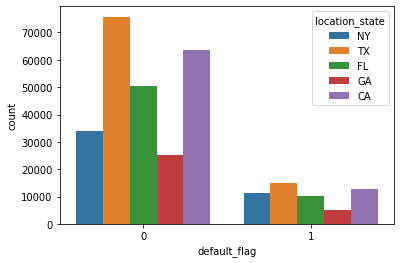

In [17]:
ax = sns.countplot(x="default_flag", hue="location_state", data=df)

In [27]:
df.groupby(["location_state", "default_flag"]).count()

user_id     id  origination_date  amount  banks  \
location_state default_flag                                                    
CA             0               63487  63487             63487   63487  63487   
               1               12629  12629             12629   12629  12629   
FL             0               50385  50385             50385   50385  50385   
               1               10069  10069             10069   10069  10069   
GA             0               25135  25135             25135   25135  25135   
               1                5054   5054              5054    5054   5054   
NY             0               33876  33876             33876   33876  33876   
               1               11425  11425             11425   11425  11425   
TX             0               75727  75727             75727   75727  75727   
               1               15079  15079             15079   15079  15079   

                             pay_frequency  
location_state default_flag                 
CA             0                     63487  
               1                     12629  
FL             0                     50385  
               1                     10069  
GA             0                     25135  
               1                      5054  
NY             0                     33876  
               1                     11425  
TX             0                     75727  
               1                     15079

In [49]:
df.groupby(["pay_frequency", "default_flag"]).count()

user_id     id  origination_date  amount  banks  \
pay_frequency default_flag                                                    
Biweekly      0               62311  62311             62311   62311  62311   
              1               13677  13677             13677   13677  13677   
Irregular     0               62260  62260             62260   62260  62260   
              1               13597  13597             13597   13597  13597   
Monthly       0               49613  49613             49613   49613  49613   
              1               10704  10704             10704   10704  10704   
Weekly        0               74426  74426             74426   74426  74426   
              1               16278  16278             16278   16278  16278   

                            location_state  
pay_frequency default_flag                  
Biweekly      0                      62311  
              1                      13677  
Irregular     0                      62260  
              1                      13597  
Monthly       0                      49613  
              1                      10704  
Weekly        0                      74426  
              1                      16278